## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
import tensorflow.keras as keras
from sklearn.preprocessing import OneHotEncoder

workspace = '/content/drive/MyDrive/Multimedia Term Project/dataset/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read our data

In [ ]:
# our_df = pd.read_csv(workspace+'integrated.csv')
# our_df = pd.read_csv(workspace+'standard_integrated.csv')
# our_df = pd.read_csv(workspace+'integrated_rescaled_all.csv')
# our_df = pd.read_csv(workspace+'rescaled_all_frames/all_training_dataset.csv')
# our_df = pd.read_csv(workspace+'standard_all_frames/all_standard_training_dataset.csv')
# our_df = pd.read_csv(workspace+'standard_all_frames/all_frames_standard_0.csv')
our_df = pd.read_csv("/content/drive/MyDrive/Multimedia Term Project/dataset/rescaled_all_frames/all_training_dataset.csv")

Y_test = our_df[['event']]
X_test = our_df[['EDA', 'BVP', 'HR', 'frame_num']]

# # original random split
X = our_df[['EDA', 'BVP', 'HR', 'TEMP']]
# X = our_df[['EDA', 'BVP', 'HR']]
Y = our_df[['event']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True, random_state=22)

# participant 1, 5 as test data
# train = our_df[~our_df['participant'].isin([0])]
# test = our_df[our_df['participant'].isin([0])]
# X_train = train[['EDA', 'BVP', 'HR', 'frame_num']]
# X_test = test[['EDA', 'BVP', 'HR', 'frame_num']]
# Y_train = train[['event']]
# Y_test = test[['event']]

## merged try
# normal_df = our_df[our_df['event']!=4]
# sampled_df = pd.DataFrame(our_df[our_df['event']==4]).sample(n=120, random_state=22)
# merged = pd.concat([normal_df, sampled_df])
# X = merged[['EDA', 'BVP', 'HR', 'TEMP']]
# Y = merged[['event']]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=22)

In [ ]:
our_df

,participant,event,frame_num,EDA,BVP,TEMP,HR
0,0,5,1,0.740139,0.659890,0.018779,1.00000
1,0,5,2,0.740139,0.662441,0.018779,1.00000
2,0,5,3,0.740139,0.667231,0.018779,1.00000
3,0,5,4,0.740139,0.671122,0.018779,1.00000
4,0,5,5,0.740139,0.672098,0.018779,1.00000
...,...,...,...,...,...,...,...
876573,9,5,125377,0.965801,0.394845,0.864407,0.69692
876574,9,5,125378,0.965801,0.401940,0.864407,0.69692
876575,9,5,125379,0.965801,0.407937,0.864407,0.69692
876576,9,5,125380,0.965801,0.412622,0.864407,0.69692


## Random Forest Model

### Hyperparameters tuning

In [ ]:
random_grid = {'n_estimators': [1000, 1200, 1400],
               'max_features': ['sqrt'],
               'min_samples_split': [10],
               'min_samples_leaf': [4],
               'class_weight':['balanced', 'balanced_subsample'],
               'bootstrap': [True],
               'criterion': ['gini', 'entropy'], 
               'oob_score': [True, False]
                }

In [ ]:
search_model = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                       param_distributions = random_grid, 
                                      cv = 3, verbose=3, scoring = 'f1_macro',
                                       random_state=42, n_jobs = -1)
search_model.fit(X_train[['EDA', 'BVP', 'HR', 'TEMP', 'frame_num']].values, Y_train['event'].values)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
search_model.best_params_

### Model

In [ ]:
# participant 1, 5 as test data
# model = RandomForestClassifier(bootstrap=True, criterion='entropy',
#                               max_features ='auto',
#                               min_samples_split = 10,
#                               min_samples_leaf = 4,
#                               n_estimators = 1000, verbose = 2)

## for original data
# model = RandomForestClassifier(bootstrap=True, criterion='gini',  
#                               max_features ='sqrt',
#                               min_samples_split = 10,
#                                min_samples_leaf = 4,
#                               n_estimators = 1400, 
#                              verbose = 1)

## for original data
model = RandomForestClassifier(bootstrap=True, criterion='gini',  
                              max_features ='sqrt',
                              min_samples_split = 10,
                               min_samples_leaf = 4,
                              n_estimators = 1000, 
                               class_weight='balanced',
                               n_jobs=-1,
                             verbose = 1)

# #for merged data
# model = RandomForestClassifier(bootstrap=False, criterion='entropy', 
#                               max_features ='sqrt',
#                               min_samples_split = 10,
#                               min_samples_leaf = 4,
#                               n_estimators = 1200, verbose = 2)
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.5min finished


RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000, n_jobs=-1, verbose=1)

In [ ]:
# pickle.dump(model, open("/content/drive/MyDrive/Multimedia Term Project/code/random_forest_model", 'wb'))
# pickle.dump(model, open("/content/drive/MyDrive/Multimedia Term Project/code/random_forest_new_model", 'wb'))

In [ ]:
y_predict = model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    8.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   33.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   41.4s finished


## Performance

In [ ]:
print(classification_report(Y_test, y_predict))
print(accuracy_score(Y_test, y_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00       229
           5       1.00      1.00      1.00    350222

    accuracy                           1.00    350632
   macro avg       0.17      0.17      0.17    350632
weighted avg       1.00      1.00      1.00    350632

0.9987308631271532


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


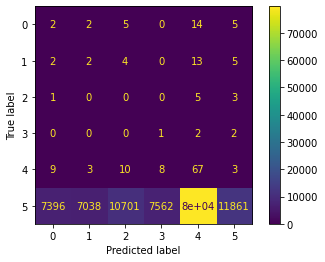

In [ ]:
cmx = confusion_matrix(Y_test, y_predict)
disp = ConfusionMatrixDisplay(cmx)
disp.plot()
plt.show()